## Your goal in this challenge is to find the factors that affect the life expectancy. Specifically, you need to find out which factors increase the expected life in the countries and which factors decrease it. 

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

In [2]:
# Connection information
user = 'dsbc_student'
pw = '7*.8G9QH21'
host = '142.93.121.174'
port = '5432'
db = 'lifeexpectancy'

In [56]:
# Establish connection
connection = create_engine('postgresql://{}:{}@{}:{}/{}'.format(user, pw, host, port, db))

# Create df
life = pd.read_sql_query('select * from lifeexpectancy', con=connection)

# Terminate connection
connection.dispose()

In [63]:
# Column names
columns = ['COUNTRY', 'YEAR', 'STATUS', 'LIFE EXPECTANCY', 'ADULT MORTALITY', 'INFANT DEATHS', 'ALCOHOL',
          'PERCENT EXPENDITURE', 'HEPATITIS B', 'MEASLES', 'BMI', 'UNDER-FIVE DEATHS', 'POLIO', 'TOTAL EXPENDITURE',
          'DIPHTHERIA', 'HIV/AIDS', 'GDP', 'POPULATION', 'THINNESS 1-19', 'THINNESS 5-9', 'INCOME COMPOSITION OF RESOURCES',
          'SCHOOLING']

# Create df
life = pd.read_csv('../data/Life Expectancy Data.csv', names=columns, skiprows=1)

## Data Cleaning

In [64]:
life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
COUNTRY                            2938 non-null object
YEAR                               2938 non-null int64
STATUS                             2938 non-null object
LIFE EXPECTANCY                    2928 non-null float64
ADULT MORTALITY                    2928 non-null float64
INFANT DEATHS                      2938 non-null int64
ALCOHOL                            2744 non-null float64
PERCENT EXPENDITURE                2938 non-null float64
HEPATITIS B                        2385 non-null float64
MEASLES                            2938 non-null int64
BMI                                2904 non-null float64
UNDER-FIVE DEATHS                  2938 non-null int64
POLIO                              2919 non-null float64
TOTAL EXPENDITURE                  2712 non-null float64
DIPHTHERIA                         2919 non-null float64
HIV/AIDS                           2938 non-null

In [69]:
life.head()

,COUNTRY,YEAR,STATUS,LIFE EXPECTANCY,ADULT MORTALITY,INFANT DEATHS,ALCOHOL,PERCENT EXPENDITURE,HEPATITIS B,MEASLES,...,POLIO,TOTAL EXPENDITURE,DIPHTHERIA,HIV/AIDS,GDP,POPULATION,THINNESS 1-19,THINNESS 5-9,INCOME COMPOSITION OF RESOURCES,SCHOOLING
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [96]:
life.describe()

,YEAR,LIFE EXPECTANCY,ADULT MORTALITY,INFANT DEATHS,ALCOHOL,PERCENT EXPENDITURE,HEPATITIS B,MEASLES,BMI,UNDER-FIVE DEATHS,POLIO,TOTAL EXPENDITURE,DIPHTHERIA,HIV/AIDS,GDP,POPULATION,THINNESS 1-19,THINNESS 5-9,INCOME COMPOSITION OF RESOURCES,SCHOOLING
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.234717,164.725664,30.303948,4.602861,738.251295,80.940461,2419.592240,38.381178,42.035739,82.617767,5.938190,82.393125,1.742103,7483.158469,1.275338e+07,4.821886,4.852144,0.627551,11.992793
std,4.613841,9.509115,124.086215,117.926501,3.916288,1987.914858,22.586855,11467.272489,19.935375,160.445548,23.367166,2.400274,23.655562,5.077785,13136.800417,5.381546e+07,4.397621,4.485854,0.204820,3.264381
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.200000,74.000000,0.000000,1.092500,4.685343,80.940461,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,72.100000,144.000000,3.000000,4.160000,64.912906,87.000000,17.000000,43.500000,4.000000,93.000000,5.938190,93.000000,0.100000,3116.561755,3.675929e+06,3.300000,3.300000,0.662000,12.100000
75%,2012.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,7483.158469,1.275338e+07,7.100000,7.200000,0.772000,14.100000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [86]:
# Review unique values in columns to see if any abnormal / null values
for column in columns:
    print('------------------------------------\n',
          'Unique values for {} \n'.format(column),
          '-----------------------------------\n',
          life[column].unique())

------------------------------------
 Unique values for COUNTRY 
 -----------------------------------
 ['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso'
 'Burundi' "Côte d'Ivoire" 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea'
 'Guinea-Bi

In [92]:
# Split variables with null into two lists
is_null_fill_median = []
is_null_fill_mean = []

for column in columns:
    if life[column].isnull().sum() > 0 and life[column].isnull().sum() <= 50:
        is_null_fill_median.append(column)
    elif life[column].isnull().sum() > 51:
        is_null_fill_mean.append(column)

In [94]:
# Fill in null values with median statistic
for column in is_null_fill_median:
    life[column].fillna(life[column].median(), inplace=True)
    
# Fill in null values with mean statistic
for column in is_null_fill_mean:
    life[column].fillna(life[column].mean(), inplace=True)

In [95]:
# Review .info method to see if any null values exist
life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
COUNTRY                            2938 non-null object
YEAR                               2938 non-null int64
STATUS                             2938 non-null object
LIFE EXPECTANCY                    2938 non-null float64
ADULT MORTALITY                    2938 non-null float64
INFANT DEATHS                      2938 non-null int64
ALCOHOL                            2938 non-null float64
PERCENT EXPENDITURE                2938 non-null float64
HEPATITIS B                        2938 non-null float64
MEASLES                            2938 non-null int64
BMI                                2938 non-null float64
UNDER-FIVE DEATHS                  2938 non-null int64
POLIO                              2938 non-null float64
TOTAL EXPENDITURE                  2938 non-null float64
DIPHTHERIA                         2938 non-null float64
HIV/AIDS                           2938 non-null

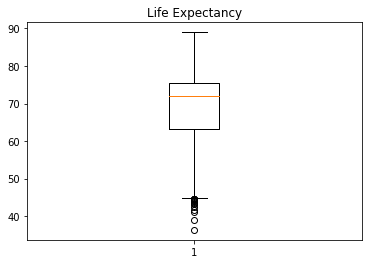

In [135]:
plt.boxplot(life['LIFE EXPECTANCY'])
plt.title('Life Expectancy')
plt.show()

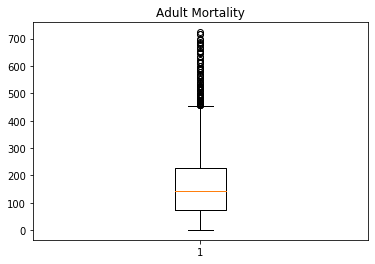

In [136]:
plt.boxplot(life['ADULT MORTALITY'])
plt.title('Adult Mortality')
plt.show()

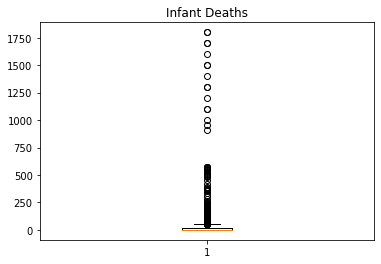

In [144]:
plt.boxplot(life['INFANT DEATHS'])
plt.title('Infant Deaths')
plt.show()

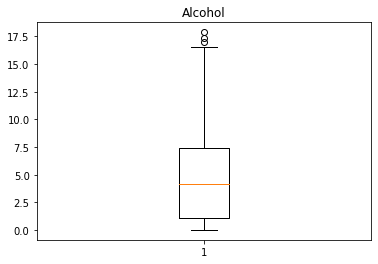

In [138]:
plt.boxplot(life['ALCOHOL'])
plt.title('Alcohol')
plt.show()

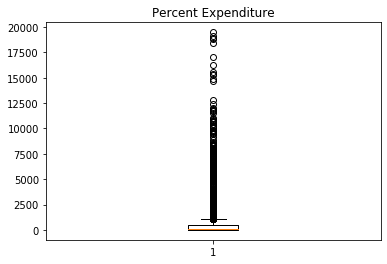

In [139]:
plt.boxplot(life['PERCENT EXPENDITURE'])
plt.title('Percent Expenditure')
plt.show()

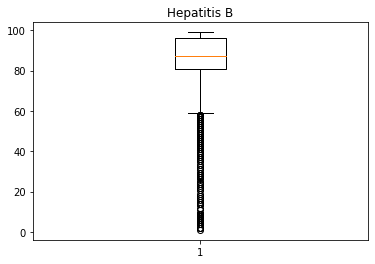

In [145]:
plt.boxplot(life['HEPATITIS B'])
plt.title('Hepatitis B')
plt.show()

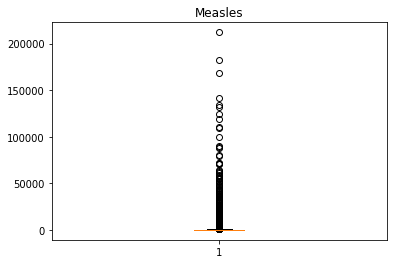

In [146]:
plt.boxplot(life['MEASLES'])
plt.title('Measles')
plt.show()

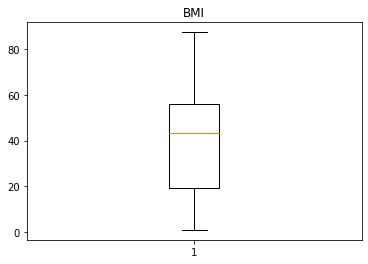

In [140]:
plt.boxplot(life['BMI'])
plt.title('BMI')
plt.show()

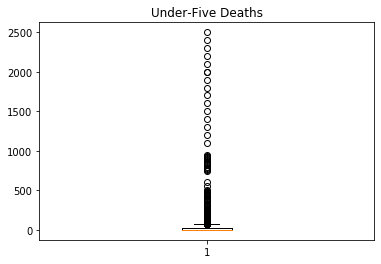

In [147]:
plt.boxplot(life['UNDER-FIVE DEATHS'])
plt.title('Under-Five Deaths')
plt.show()

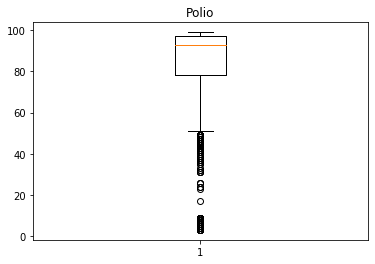

In [148]:
plt.boxplot(life['POLIO'])
plt.title('Polio')
plt.show()

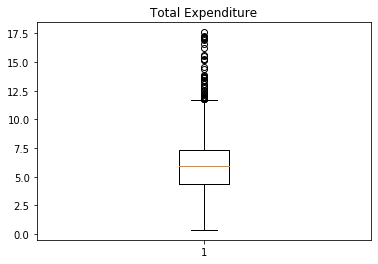

In [149]:
plt.boxplot(life['TOTAL EXPENDITURE'])
plt.title('Total Expenditure')
plt.show()

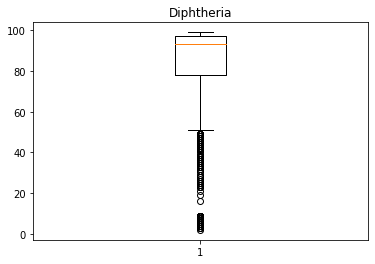

In [150]:
plt.boxplot(life['DIPHTHERIA'])
plt.title('Diphtheria')
plt.show()

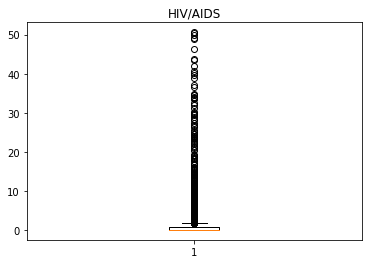

In [151]:
plt.boxplot(life['HIV/AIDS'])
plt.title('HIV/AIDS')
plt.show()

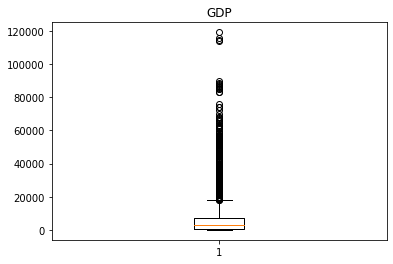

In [152]:
plt.boxplot(life['GDP'])
plt.title('GDP')
plt.show()

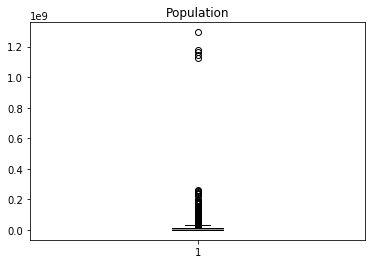

In [153]:
plt.boxplot(life['POPULATION'])
plt.title('Population')
plt.show()

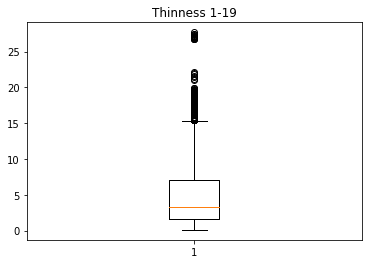

In [154]:
plt.boxplot(life['THINNESS 1-19'])
plt.title('Thinness 1-19')
plt.show()

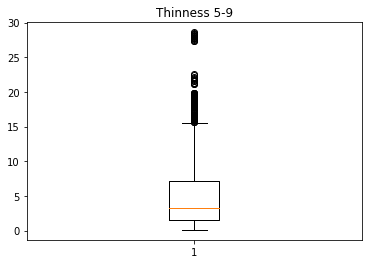

In [155]:
plt.boxplot(life['THINNESS 5-9'])
plt.title('Thinness 5-9')
plt.show()

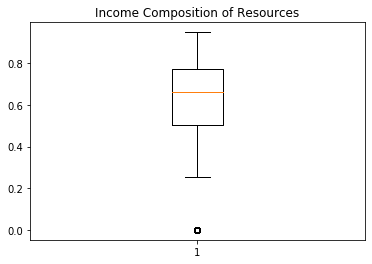

In [156]:
plt.boxplot(life['INCOME COMPOSITION OF RESOURCES'])
plt.title('Income Composition of Resources')
plt.show()

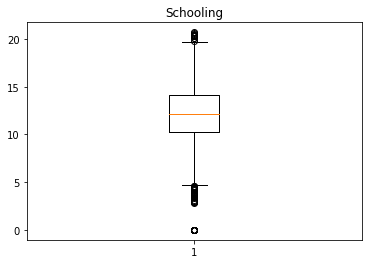

In [158]:
plt.boxplot(life['SCHOOLING'])                          
plt.title('Schooling')
plt.show()